# Curvas de Lissajous
* PET - Física UFRN
* Petiano: Gabriel Zuza
* Data: 07/2020

O Objetivo desse `Notebook`  não é abordar de forma teórica as deduções e métodos envolvidos nos problemas, mas na prática, aplicar tais conceitos obtendo resultados concretos e representativos.

Nesse `Notebook` trataremos ainda do oscilador harmônico, caso ainda não tenha visto, já publicamos sobre o [Pêndulo Simples e Forçado](https://github.com/GabrielZuza/PET/blob/master/Pendulo_Simples.ipynb). Vamos tentar reproduzir as curvas de lissajous que são padrões de curvas obtidas a partir da implementação das equações do oscilador harmônico. Essas curvas podem ser obtidas também em um osciloscópio. 

# Introdução Teórica

Vamos considerar inicialmente um oscilador harmônico simples unidimensional.Ou seja, um bloco de massa $m$ ligado ao uma mola fixa em uma das extremidades de coeficiente elástico $k_{x}$ que só se move no eixo x,como mostra a figura abaixo:

![Fonte: K. Symon. Mechanics (3rd Edition)](https://i.imgur.com/jcnXNBN.png)

 dessa forma aplicando a lei de Hooke na segunda lei de Newton temos:

$$ m\frac{d^2x}{dt^2} + k_{x}x = 0 $$

A solução para a Equação acima tem solução a seguinte Equação:

$$ x(t) = A_{x} cos(\omega_{x}t + \theta_{x}) $$

Onde $ \omega_{x}^2 = k_{x}/m$. Já $A_{x}$ e $\theta_{x}$ são constantes de amplitude e fase respectivamente.

Pronto! Agora vamos implementar essas Equações 

# Importando as principais bibliotecas:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

Vamos criar uma função que define o nome dos eixos X e Y em nosso plot, com objetivo de economizar linhas.

Perceba usamos uma estrutura não tão comum para plotar, explico:
```
plt.xlabel("${"+ x + "}$")
```
Usamos a estrutura ` {$ ` para entrar no ambiente equação do `Latex` e ` }$ ` para sair do mesmo. Com isso, usamos soma de `Strings` para passar como parâmetro de nossa função uma string  como ele requer.

Caso queria se aprofundar em [Operações com Strings](https://developers.google.com/edu/python/strings) 

In [11]:
def label(x,y):
    plt.xlabel("${"+ x + "}$")
    plt.ylabel("${" + y + "}$",rotation =0)

Detalhe: Não vamos usar essa função tão cedo, mas é uma boa prática em programação você começar seus códigos importandos as bibliotecas e declarando as funções, mesmo que estas só irão ser usadas mais para frente do código;

Inicialmente consideraremos o movimento em apenas 1 dimensão, $x$, vamos definir constantes arbitrárias:

In [12]:
Ax = 3
omega_x = 2
theta_x = np.pi/2

Agora, Vamos gerar um vetor que contem os valores de tempo para a nossa simulação

In [13]:
t = np.linspace(-4*np.pi,12*np.pi,5000)

Com isso, podemos fazer a simulação, aplicando a função $x(t)$ nesse vetor tempo

In [14]:
x = Ax*np.sin(omega_x* t + theta_x)


Plotando os resutados, Temos:

Text(0, 0.5, 'Posição')

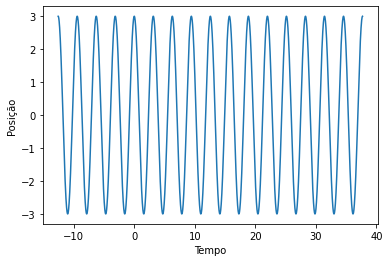

In [15]:
plt.plot(t,x)
plt.xlabel("Tempo")
plt.ylabel("Posição")

Obtemos uma curva senoidal com amplitude $A_{x}$ , período $\omega_{x}$ e fase $\theta_{x}$. Tudo conforme era esperado

# Oscilador tridimensional

Com essa base vamos aplicar essa mesma equações para um movimento em 3 dimensões, pode parecer defícil imaginar um oscilador harmonico tridimensional, você pode pensar em um bloco preso por molas nos 3 eixos, como mostra a figura abaixo:

![texto alternativo](https://i.imgur.com/4XKkaH6.png)

Dessa forma, de modo totalmente análogo ao movimento unidimensional, as Equações são:


$$ x(t) = A_{x} cos(\omega_{x}t + \theta_{x}) $$


$$ y(t) = A_{y} cos(\omega_{y}t + \theta_{y}) $$


$$ z(t) = A_{z} cos(\omega_{z}t + \theta_{z}) $$


Assim sendo, vamos repetir o procedimento, declarando constantes:

In [16]:
A_x = 1
A_y = 2
A_z = 3
omega_x = 3 
omega_y = 5
omega_z = 6
theta_x = np.pi/2
theta_y = np.pi
theta_z = 2*np.pi

Usaremos o mesmo array de tempo `t` até por fatores comparativos

Agora, aplicando as funções $x(t),y(t),z(t)$ no array de tempo:

In [17]:
x = A_x*np.sin(omega_x* t + theta_x)
y = A_y*np.sin(omega_y* t + theta_y)
z = A_z*np.sin(omega_z* t + theta_z)

Perceba que em $ t = 0$, $x = sen(\theta_{x}$). Assim podemos definir o ponto inicial da seguinte forma:

In [18]:
x0 = np.sin(theta_x)
y0 = np.sin(theta_y)
z0 = np.sin(theta_z)

Plotando os resultados em 3 dimensões, esse seria o trajeto do bloco:

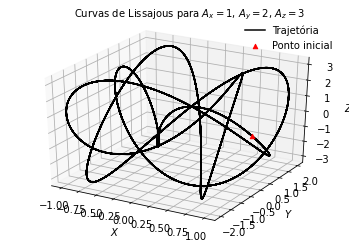

In [19]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(x, y, z,color="k", label='Trajetória')
ax.scatter(x0, y0, z0,marker="^",color="r",label="Ponto inicial")

ax.legend(frameon=False)
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
ax.text2D(0.2, 1,r"Curvas de Lissajous para $A_{x} =$" + str(A_x) + ", $A_{y} =$"+ str(A_y) + ", $A_{z} =$"+ str(A_z), transform = ax.transAxes)
plt.show()


Vamos ver como ficou usando a figura iterativa: [Clique Aqui](https://i.imgur.com/3fERcuM.mp4)

Para visualizar desse jetio em seu computador, basta usar a [magic line](https://ipython.readthedocs.io/en/stable/interactive/magics.html) `%matplotlib qt`

Por último, vamos plotar as Curvas de Lissajous, para tanto, basta plotar cada eixo pelo outro:

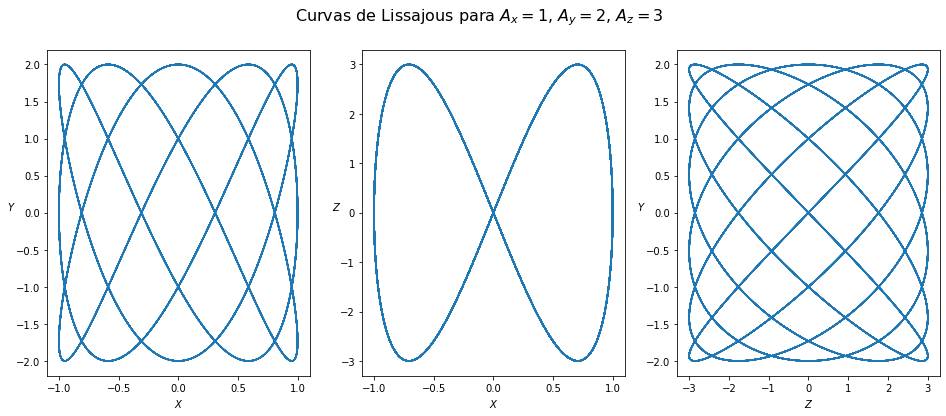

In [20]:
fig = plt.figure(figsize=(16,6))
fig.suptitle(r"Curvas de Lissajous para $A_{x} =$" + str(A_x) + ", $A_{y} =$"+ str(A_y) + ", $A_{z} =$"+ str(A_z), fontsize=16)
plt.subplot(131)
plt.plot(x,y)
label('X','Y')

plt.subplot(132)
plt.plot(x,z)
label('X','Z')

plt.subplot(133)
plt.plot(z,y)
label('Z','Y')

Você pode mudar os valores das constantes para obter variações dessas figuras !!

# Fontes e Referências:
* Ambas as figuras foram tiradas da seguinte fonte:

K. Symon. Mechanics (3rd Edition)